# Data preparation

In [17]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("white")

#### Load the data

In [64]:
df_episodes1 = pd.read_csv("../results/play/20240427-19.34.39_play_20240421-16.01.26_baseline_fast_decay/20240427-19.34.39_play_20240421-16.01.26_baseline_fast_decay_episodes.csv", header=None)
# add column names
df_episodes1.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
df_episodes1['steps'] = df_episodes1['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [65]:
df_episodes2 = pd.read_csv("../results/play/20240427-21.08.37_play_20240425-11.01.27_symbolic_constraints_target_active_intrusive/20240427-21.08.37_play_20240425-11.01.27_symbolic_constraints_target_active_intrusive_episodes.csv", header=None)
# add column names
df_episodes2.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
df_episodes2['steps'] = df_episodes2['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [66]:
concatenated = pd.concat([df_episodes1.assign(dataset='baseline'), df_episodes2.assign(dataset='target')])

<Axes: xlabel='steps', ylabel='flag'>

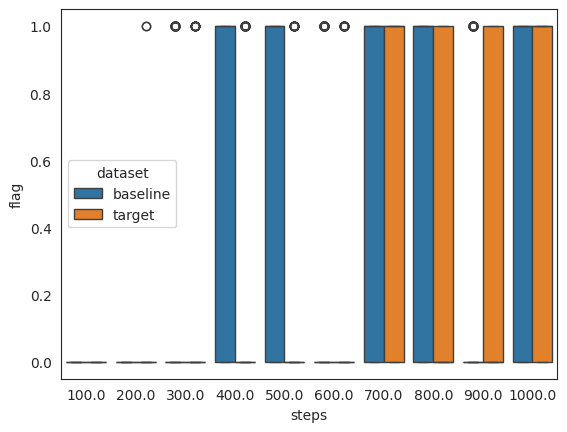

In [67]:
sns.boxplot(x ="steps", y="flag", hue ="dataset", data = concatenated)

In [68]:
df_episodes1_agg = df_episodes1.groupby(['model_id', 'steps'])['flag'].agg(['mean', 'std', 'size'])
df_episodes2_agg = df_episodes2.groupby(['model_id', 'steps'])['flag'].agg(['mean', 'std', 'size'])
df_episodes1_agg.head(5)

,,mean,std,size
model_id,steps,,,
20240421-16.01.26_baseline_fast_decay_1000000_1_target_net,1000.0,0.620000,0.486197,300
20240421-16.01.26_baseline_fast_decay_100000_1_target_net,100.0,0.000000,0.000000,300
20240421-16.01.26_baseline_fast_decay_200000_1_target_net,200.0,0.000000,0.000000,300
20240421-16.01.26_baseline_fast_decay_300000_1_target_net,300.0,0.160000,0.367219,300
20240421-16.01.26_baseline_fast_decay_400000_1_target_net,400.0,0.633333,0.482700,300


In [69]:
concatenated = pd.concat([df_episodes1_agg.assign(dataset='baseline'), df_episodes2_agg.assign(dataset='target')])
concatenated.sort_values(by=['steps'])

,,mean,std,size,dataset
model_id,steps,,,,
20240421-16.01.26_baseline_fast_decay_100000_1_target_net,100.0,0.000000,0.000000,300,baseline
20240425-11.01.27_symbolic_constraints_target_active_intrusive_100000_1_target_net,100.0,0.000000,0.000000,300,target
20240425-11.01.27_symbolic_constraints_target_active_intrusive_200000_1_target_net,200.0,0.006667,0.081513,300,target
20240421-16.01.26_baseline_fast_decay_200000_1_target_net,200.0,0.000000,0.000000,300,baseline
20240421-16.01.26_baseline_fast_decay_300000_1_target_net,300.0,0.160000,0.367219,300,baseline
20240425-11.01.27_symbolic_constraints_target_active_intrusive_300000_1_target_net,300.0,0.053333,0.225073,300,target
20240425-11.01.27_symbolic_constraints_target_active_intrusive_400000_1_target_net,400.0,0.150000,0.357668,300,target
20240421-16.01.26_baseline_fast_decay_400000_1_target_net,400.0,0.633333,0.482700,300,baseline
20240425-11.01.27_symbolic_constraints_target_active_intrusive_500000_1_target_net,500.0,0.076667,0.266506,300,target


#### plot the average wins per type per model

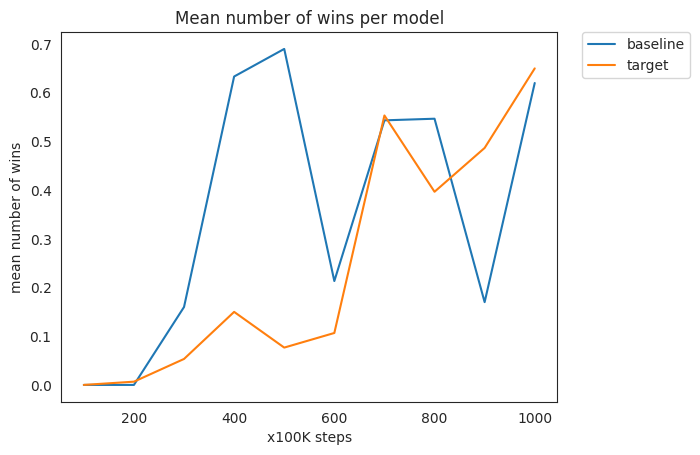

In [72]:
ax = sns.lineplot(x='steps', y='mean', data=concatenated, hue='dataset').set(title='Mean number of wins per model', xlabel="x100K steps", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

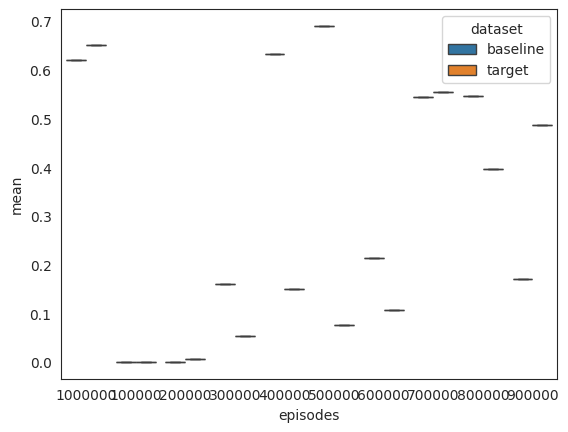

In [47]:
ax = sns.boxplot(x='episodes', y='mean', data=concatenated, hue='dataset')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

KeyError: 'seed'

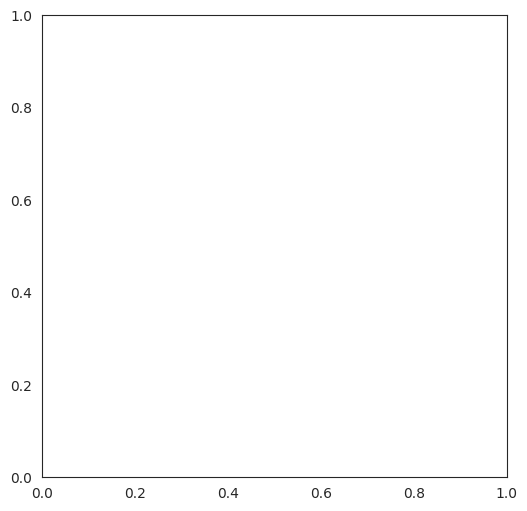

In [31]:
fig_reward, ax_flag = plt.subplots(figsize=(6, 6))
sns.regplot(x='seed', y='mean', data=df_episodes1_agg, fit_reg=True, ci=None, ax=ax_flag, label='fast decay')
sns.regplot(x='seed', y='mean', data=df_episodes2_agg, fit_reg=True, ci=None, ax=ax_flag, label='constrainst-forget')
ax_flag.set(ylabel='mean wins', xlabel='seed')
ax_flag.legend()

And plot the average number of flags per 1000 episodes

In [23]:
bins_flags1 = range(0, 100, 10)
df_agg_flags1 = df_episodes1.groupby(pd.cut(df_episodes1['episode'], bins=bins_flags1), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags1 = [*bins_flags1]
bins_flags1.pop(-1)
df_agg_flags1["bin"] = bins_flags1
df_agg_flags1.head(5)

ValueError: Length of values (9) does not match length of index (1)

In [ ]:
bins_flags2 = range(0, 100, 10)
df_agg_flags2 = df_episodes2.groupby(pd.cut(df_episodes2['episode'], bins=bins_flags2), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags2 = [*bins_flags2]
bins_flags2.pop(-1)
df_agg_flags2["bin"] = bins_flags2
df_agg_flags2.head(5)

In [ ]:
bins_flags3 = range(0, 100, 10)
df_agg_flags3 = df_episodes3.groupby(pd.cut(df_episodes3['episode'], bins=bins_flags3), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags3 = [*bins_flags3]
bins_flags3.pop(-1)
df_agg_flags3["bin"] = bins_flags3
df_agg_flags3.head(5)

In [ ]:
bins_flags4 = range(0, 100, 10)
df_agg_flags4 = df_episodes4.groupby(pd.cut(df_episodes4['episode'], bins=bins_flags4), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags4 = [*bins_flags4]
bins_flags4.pop(-1)
df_agg_flags4["bin"] = bins_flags4
df_agg_flags4.head(5)

In [ ]:
concatenated_flags = pd.concat([df_agg_flags1.assign(dataset='baseline fast decay'), df_agg_flags2.assign(dataset='constraints-forget'), df_agg_flags3.assign(dataset='target-active'), df_agg_flags4.assign(dataset='target-reactive')])

In [ ]:
ax = sns.lineplot(x='bin', y='mean', data=concatenated_flags, hue='dataset').set(title='Mean number of wins per 10 episodes', xlabel="episode", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Show epsilon decay over time for both versions to determine if the high-epsilon interval is big enough

In [ ]:
sns.lineplot(x='episode', y='epsilon', data=concatenated, hue='dataset')